In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
def decision_boundary(p,X_a,X_b,title,Y):
    plt.scatter(X_a[Y==0] ,X_b[Y==0],c='red',label="class 0")
    plt.scatter(X_a[Y==1] ,X_b[Y==1],c='blue',label="class 1")
    x_vals = np.linspace(min(X_a), max(X_a), 100)
    try:
        y_vals = -(p.w_a * x_vals + p.b) / p.w_b

        plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
        plt.xlabel("X_a")
        plt.ylabel("X_b")
        plt.title(title)
        plt.legend()
        plt.show()
    except:
        print("decision boundary cannot be drawn:::")


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self):
        self.w_a =1.0
        self.w_b =1.0
        self.b= 1.0

    def model(self,x_a,x_b):
        z = self.w_a * x_a + self.w_b * x_b + self.b
        return 1 if z >= 0 else 0

    def predict(self, X_a, X_b):
        Y = []
        for a,b in zip(X_a, X_b):
            Y.append(self.model(a, b))
        return np.array(Y)

    def fit(self, X_a, X_b,Y,epochs=10, lr=1):
        max_accu = 0

        for _ in range(epochs):
            for x_a, x_b, y in zip(X_a, X_b, Y):
                y_pred = self.model(x_a, x_b)

                if y == 1 and y_pred == 0:
                    self.w_a=self.w_a+ lr * x_a
                    self.w_b=self.w_b+ lr * x_b
                    self.b =self.b - lr*1

                elif y == 0 and y_pred== 1:
                    self.w_a= self.w_a -lr *x_a
                    self.w_b=self.w_b- lr *x_b
                    self.b =self.b+ lr

            acc = accuracy_score(self.predict(X_a, X_b), Y)
            if acc > max_accu:
                max_accu = acc
                best_w_a,best_w_b, best_b = self.w_a, self.w_b, self.b

        self.w_a, self.w_b, self.b = best_w_a, best_w_b, best_b
        print("Maximum accuracy:", max_accu)


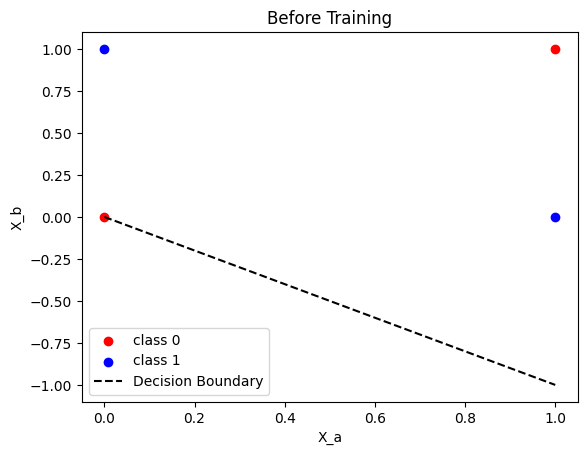

Maximum accuracy: 0.5


C:\Users\AWANTIKA\AppData\Local\Temp\ipykernel_16120\2840808498.py:6: RuntimeWarning: divide by zero encountered in divide
  y_vals = -(p.w_a * x_vals + p.b) / p.w_b


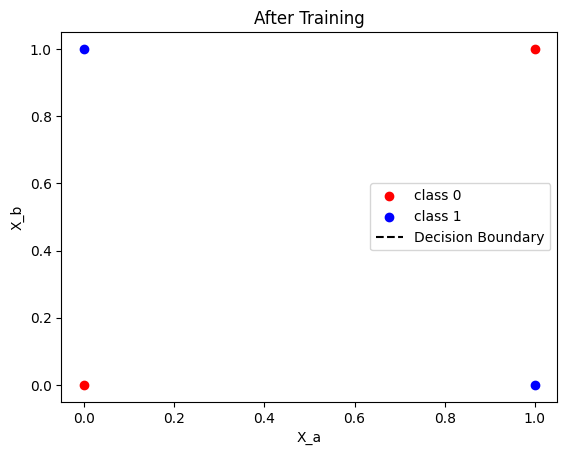

In [22]:
X_a = np.array([0,0,1,1])
X_b = np.array([0,1,0,1])
Y   = np.array([0,1,1,0])

p = Perceptron()

decision_boundary(p,X_a,X_b,"Before Training", Y)

p.fit(X_a,X_b,Y,epochs=10,lr=1)

decision_boundary(p,X_a,X_b,"After Training", Y)
